In [20]:
import pandas as pd
import numpy as np 
import os
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib.pylab import rcParams
seed = 7
np.random.seed(seed)
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 10, 5
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix

# Facebook comment prediction Data Set

In [3]:
os.chdir("C:\Vishakha\Machine Learning\Assignment_2")
Dataset1 = pd.read_csv("Fb_Data.csv")
Dataset1.head()

,PagePopularitylikes,PageCheckin,Pagetalking about,PageCategory,MinCC1,MaxCC1,AverageCC1,MedianCC1,SDCC1,MinCC2,...,PostpublishedFriday,PostpublishedSaturday,BaseDateTimeSunday,BaseDateTimeMonday,BaseDateTTuesday,BaseDateTimeWednesday,BaseDateTimeThursday,BaseDateTimeFriday,BaseDateTimeSaturday,TargetVariable
0,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
Dataset1 = pd.DataFrame(Dataset1)
Dataset1.columns = Dataset1.columns.to_series().apply(lambda x: x.strip())

In [5]:
Dataset1['New_Target'] = [1 if each > 0 else 0 for each in Dataset1['TargetVariable']]
y = Dataset1['New_Target'].values
x = Dataset1.drop(['New_Target'],axis = 1)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)  


,PagePopularitylikes,PageCheckin,Pagetalking about,PageCategory,MinCC1,MaxCC1,AverageCC1,MedianCC1,SDCC1,MinCC2,...,PostpublishedFriday,PostpublishedSaturday,BaseDateTimeSunday,BaseDateTimeMonday,BaseDateTTuesday,BaseDateTimeWednesday,BaseDateTimeThursday,BaseDateTimeFriday,BaseDateTimeSaturday,TargetVariable
count,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,...,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000
mean,0.002828,0.004297,0.007364,0.220014,0.000736,0.158202,0.024178,0.015391,0.062642,0.000177,...,0.148822,0.138707,0.147221,0.133327,0.134144,0.145280,0.148685,0.145689,0.145655,0.005816
std,0.015049,0.019783,0.020392,0.189581,0.010446,0.178470,0.037851,0.030453,0.076315,0.007897,...,0.355919,0.345647,0.354332,0.339933,0.340813,0.352389,0.355784,0.352800,0.352766,0.028749
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000081,0.000000,0.000110,0.076190,0.000000,0.015745,0.002436,0.000854,0.007598,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000636,0.000000,0.001202,0.161905,0.000000,0.084325,0.010301,0.005126,0.032565,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.002570,0.000090,0.007855,0.295238,0.000000,0.255773,0.031216,0.017941,0.096815,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002299
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


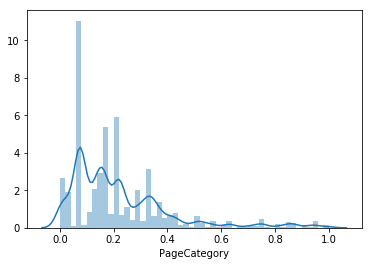

In [7]:
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])
sns.distplot(x_train['PageCategory'])
x_train.describe()

# ReLu and Sigmoid

In [96]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=54))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
# #Third  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [97]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [98]:

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]

In [99]:
#Fitting the data to the training dataset
model =classifier.fit(x_train,y_train,epochs=30,callbacks=callbacks,batch_size =32,validation_data=(x_test, y_test))

Train on 29364 samples, validate on 12585 samples
Epoch 1/30
29364/29364 [==============================] - 3s 114us/step - loss: 0.5776 - acc: 0.6845 - val_loss: 0.4809 - val_acc: 0.7805
Epoch 2/30
29364/29364 [==============================] - 2s 78us/step - loss: 0.4675 - acc: 0.7806 - val_loss: 0.4564 - val_acc: 0.7918
Epoch 3/30
29364/29364 [==============================] - 2s 79us/step - loss: 0.4510 - acc: 0.7902 - val_loss: 0.4463 - val_acc: 0.7968
Epoch 4/30
29364/29364 [==============================] - 2s 79us/step - loss: 0.4414 - acc: 0.7968 - val_loss: 0.4386 - val_acc: 0.8041
Epoch 5/30
29364/29364 [==============================] - 2s 78us/step - loss: 0.4344 - acc: 0.8035 - val_loss: 0.4330 - val_acc: 0.8092
Epoch 6/30
29364/29364 [==============================] - 2s 79us/step - loss: 0.4284 - acc: 0.8083 - val_loss: 0.4262 - val_acc: 0.8160
Epoch 7/30
29364/29364 [==============================] - 2s 78us/step - loss: 0.4215 - acc: 0.8121 - val_loss: 0.4205 - val_ac

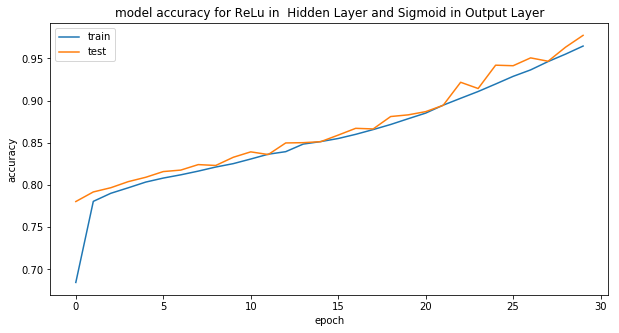

In [100]:

plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy for ReLu in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [101]:
eval_model=classifier.evaluate(x_train, y_train)
eval_model

29364/29364 [==============================] - 1s 31us/step


[0.08424776907010034, 0.9794987058902596]

In [102]:
y_pred=classifier.predict(x_test)
y_pred =(y_pred>0.5)

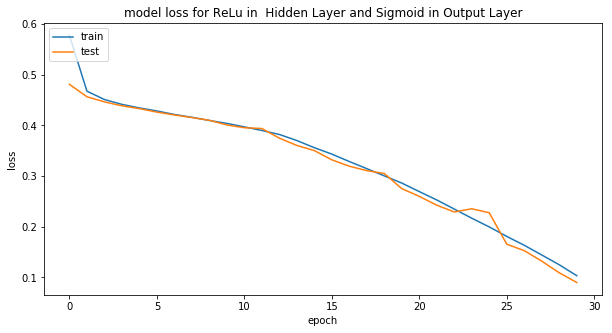

In [103]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss for ReLu in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

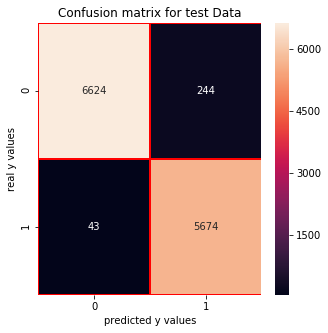

In [105]:

cm_nn_1 = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Confusion matrix for test Data")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

# Sigmoid

In [169]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='sigmoid', kernel_initializer='random_normal', input_dim=54))
# #Second  Hidden Layer
classifier.add(Dense(4, activation='sigmoid', kernel_initializer='random_normal'))
# #Third  Hidden Layer
classifier.add(Dense(4, activation='sigmoid', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [170]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [171]:

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]

In [172]:
#Fitting the data to the training dataset
model_1 =classifier.fit(x_train,y_train,epochs=30,callbacks=callbacks,batch_size =32,validation_data=(x_test, y_test))

Train on 29364 samples, validate on 12585 samples
Epoch 1/30
29364/29364 [==============================] - 2s 62us/step - loss: 0.6888 - acc: 0.5472 - val_loss: 0.6875 - val_acc: 0.5457
Epoch 2/30
29364/29364 [==============================] - 1s 37us/step - loss: 0.6569 - acc: 0.5985 - val_loss: 0.5804 - val_acc: 0.7396
Epoch 3/30
29364/29364 [==============================] - 1s 35us/step - loss: 0.5356 - acc: 0.7575 - val_loss: 0.5061 - val_acc: 0.7720
Epoch 4/30
29364/29364 [==============================] - 1s 36us/step - loss: 0.5011 - acc: 0.7704 - val_loss: 0.4894 - val_acc: 0.7777
Epoch 5/30
29364/29364 [==============================] - 1s 36us/step - loss: 0.4858 - acc: 0.7775 - val_loss: 0.4764 - val_acc: 0.7832
Epoch 6/30
29364/29364 [==============================] - 1s 38us/step - loss: 0.4736 - acc: 0.7824 - val_loss: 0.4654 - val_acc: 0.7889
Epoch 7/30
29364/29364 [==============================] - 1s 41us/step - loss: 0.4634 - acc: 0.7867 - val_loss: 0.4563 - val_acc

In [173]:
eval_model=classifier.evaluate(x_train, y_train)
eval_model

29364/29364 [==============================] - 1s 17us/step


[0.37241865067906804, 0.8372837487918254]

In [174]:
y_pred=classifier.predict(x_test)
y_pred =(y_pred>0.5)

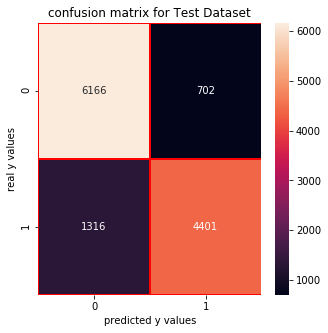

In [175]:
cm_nn_2 = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nn_2,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("confusion matrix for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

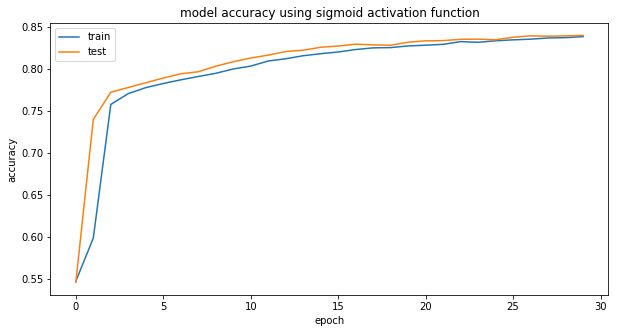

In [176]:

plt.plot(model_1.history['acc'])
plt.plot(model_1.history['val_acc'])
plt.title('model accuracy using sigmoid activation function')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

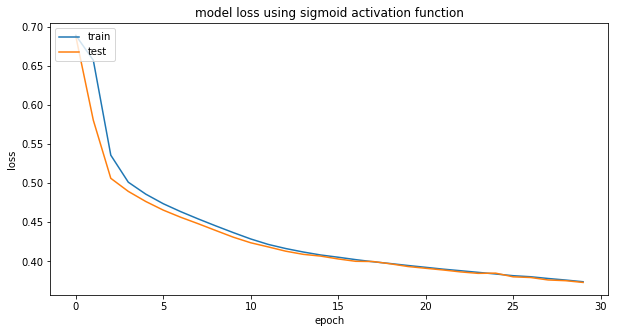

In [177]:
plt.plot(model_1.history['loss'])
plt.plot(model_1.history['val_loss'])
plt.title('model loss using sigmoid activation function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Tanh and Sigmoid

In [135]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal', input_dim=54))
# #Second  Hidden Layer
classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal'))
# #Third  Hidden Layer
classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [136]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [137]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]

In [138]:
#Fitting the data to the training dataset
model_2 =classifier.fit(x_train,y_train,epochs=30,callbacks=callbacks,batch_size =32,validation_data=(x_test, y_test))

Train on 29364 samples, validate on 12585 samples
Epoch 1/30
29364/29364 [==============================] - 2s 61us/step - loss: 0.5403 - acc: 0.7250 - val_loss: 0.4678 - val_acc: 0.7843
Epoch 2/30
29364/29364 [==============================] - 1s 35us/step - loss: 0.4517 - acc: 0.7919 - val_loss: 0.4399 - val_acc: 0.8014
Epoch 3/30
29364/29364 [==============================] - 1s 33us/step - loss: 0.4329 - acc: 0.8045 - val_loss: 0.4282 - val_acc: 0.8141
Epoch 4/30
29364/29364 [==============================] - 1s 35us/step - loss: 0.4214 - acc: 0.8131 - val_loss: 0.4273 - val_acc: 0.8130
Epoch 5/30
29364/29364 [==============================] - 1s 33us/step - loss: 0.4114 - acc: 0.8194 - val_loss: 0.4023 - val_acc: 0.8301
Epoch 6/30
29364/29364 [==============================] - 1s 35us/step - loss: 0.4000 - acc: 0.8277 - val_loss: 0.3966 - val_acc: 0.8323
Epoch 7/30
29364/29364 [==============================] - 1s 34us/step - loss: 0.3863 - acc: 0.8368 - val_loss: 0.3745 - val_acc

In [120]:
eval_model=classifier.evaluate(x_train, y_train)
eval_model

29364/29364 [==============================] - 1s 31us/step


[0.0017679523886089436, 0.9998978340825501]

In [121]:
y_pred=classifier.predict(x_test)
y_pred =(y_pred>0.5)

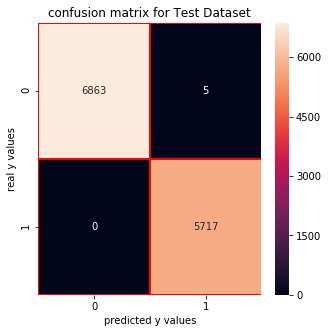

In [122]:
cm_nn_3 = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nn_3,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("confusion matrix for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

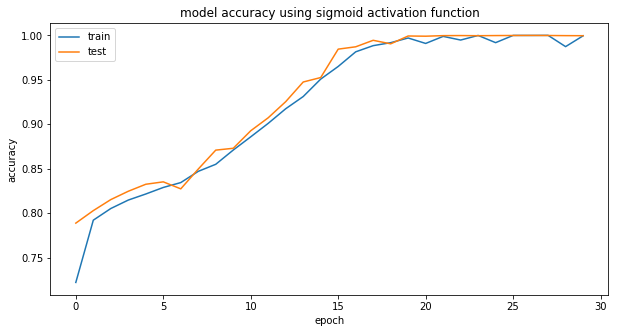

In [123]:

plt.plot(model_2.history['acc'])
plt.plot(model_2.history['val_acc'])
plt.title('model accuracy for Tanh in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

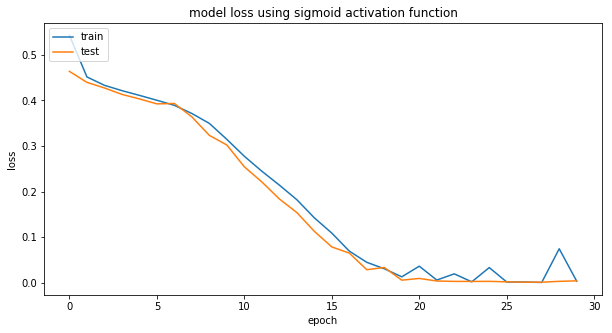

In [125]:
plt.plot(model_2.history['loss'])
plt.plot(model_2.history['val_loss'])
plt.title('model accuracy for Tanh in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Relu and Softmax

In [139]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=54))
# #Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
# #Third  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='softmax', kernel_initializer='random_normal'))

In [140]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [141]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]

In [142]:
#Fitting the data to the training dataset
model_3 =classifier.fit(x_train,y_train,epochs=30,callbacks=callbacks,batch_size =32,validation_data=(x_test, y_test))

Train on 29364 samples, validate on 12585 samples
Epoch 1/30
29364/29364 [==============================] - 2s 57us/step - loss: 8.7237 - acc: 0.4528 - val_loss: 8.7002 - val_acc: 0.4543
Epoch 2/30
29364/29364 [==============================] - 1s 34us/step - loss: 8.7237 - acc: 0.4528 - val_loss: 8.7002 - val_acc: 0.4543
Epoch 3/30
29364/29364 [==============================] - 1s 34us/step - loss: 8.7237 - acc: 0.4528 - val_loss: 8.7002 - val_acc: 0.4543


In [143]:
eval_model=classifier.evaluate(x_train, y_train)
eval_model

29364/29364 [==============================] - 0s 16us/step


[8.723683908384837, 0.4527993461462477]

In [144]:
y_pred=classifier.predict(x_test)
y_pred =(y_pred>0.5)

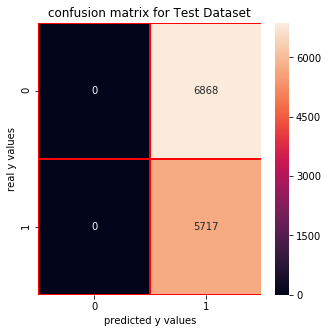

In [145]:
cm_nn_4 = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nn_4,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("confusion matrix for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

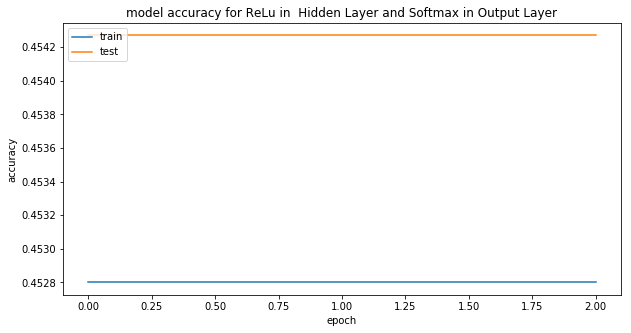

In [146]:
plt.plot(model_3.history['acc'])
plt.plot(model_3.history['val_acc'])
plt.title('model accuracy for ReLu in  Hidden Layer and Softmax in Output Layer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

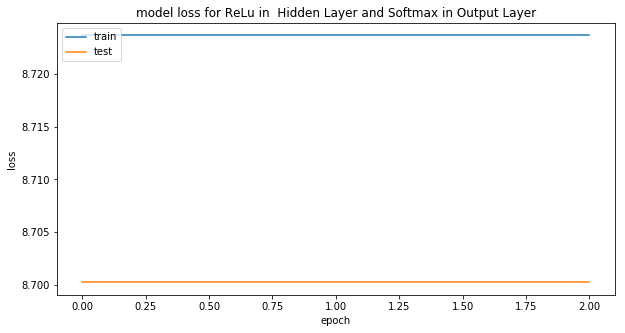

In [147]:
plt.plot(model_3.history['loss'])
plt.plot(model_3.history['val_loss'])
plt.title('model loss for ReLu in  Hidden Layer and Softmax in Output Layer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Tuning the hyperparameters using Tanh and Sigmoid activation Functions

In [284]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(10, activation='tanh', kernel_initializer='random_normal', input_dim=54))
# #Second  Hidden Layer
classifier.add(Dense(10, activation='tanh', kernel_initializer='random_normal'))
# # #Third  Hidden Layer
# classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [285]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [286]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]

In [287]:
#Fitting the data to the training dataset
model_2 =classifier.fit(x_train,y_train,epochs=30,callbacks=callbacks,batch_size =32,validation_data=(x_test, y_test))

Train on 29364 samples, validate on 12585 samples
Epoch 1/30
29364/29364 [==============================] - 3s 89us/step - loss: 0.5150 - acc: 0.7422 - val_loss: 0.4535 - val_acc: 0.7932
Epoch 2/30
29364/29364 [==============================] - 1s 46us/step - loss: 0.4449 - acc: 0.7948 - val_loss: 0.4353 - val_acc: 0.8046
Epoch 3/30
29364/29364 [==============================] - 1s 46us/step - loss: 0.4291 - acc: 0.8067 - val_loss: 0.4233 - val_acc: 0.8183
Epoch 4/30
29364/29364 [==============================] - 1s 46us/step - loss: 0.4168 - acc: 0.8157 - val_loss: 0.4209 - val_acc: 0.8195
Epoch 5/30
29364/29364 [==============================] - 1s 46us/step - loss: 0.4067 - acc: 0.8219 - val_loss: 0.3985 - val_acc: 0.8336
Epoch 6/30
29364/29364 [==============================] - 1s 45us/step - loss: 0.3942 - acc: 0.8305 - val_loss: 0.3847 - val_acc: 0.8408
Epoch 7/30
29364/29364 [==============================] - 1s 46us/step - loss: 0.3772 - acc: 0.8410 - val_loss: 0.3687 - val_acc

In [288]:
eval_model=classifier.evaluate(x_train, y_train)
eval_model

29364/29364 [==============================] - 1s 23us/step


[0.002139687121804804, 0.9998297234709168]

In [289]:
y_pred=classifier.predict(x_test)
y_pred =(y_pred>0.5)

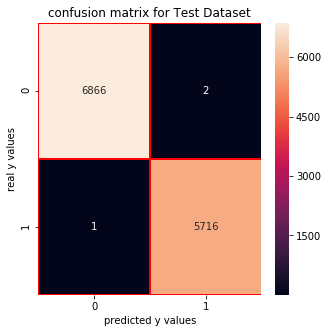

In [290]:
cm_nn_3 = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nn_3,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("confusion matrix for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

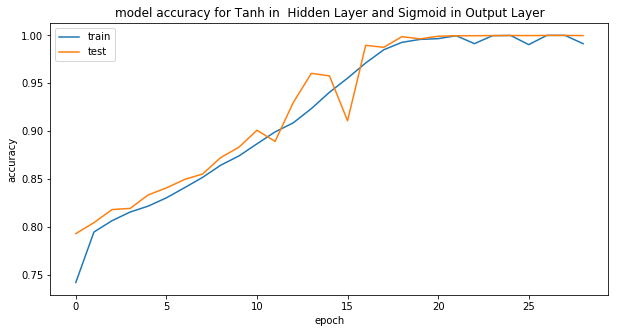

In [291]:

plt.plot(model_2.history['acc'])
plt.plot(model_2.history['val_acc'])
plt.title('model accuracy for Tanh in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

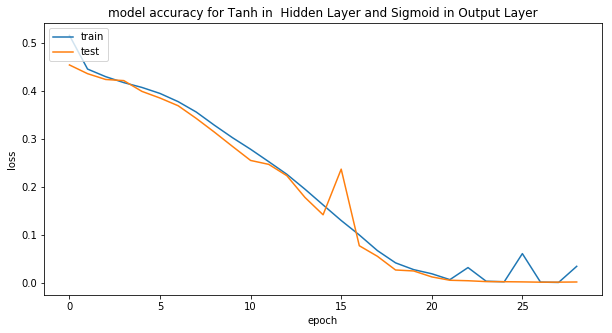

In [292]:
plt.plot(model_2.history['loss'])
plt.plot(model_2.history['val_loss'])
plt.title('model accuracy for Tanh in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# K fold cross validation

In [298]:

# Create function returning a compiled network
def create_network():
    
    classifier = Sequential()
    #First Hidden Layer
    classifier.add(Dense(10, activation='tanh', kernel_initializer='random_normal', input_dim=54))
    # #Second  Hidden Layer
    classifier.add(Dense(10, activation='tanh', kernel_initializer='random_normal'))
    #Output Layer
    classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
    # Compile neural network
    #Compiling the neural network
    classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
    
    # Return compiled network
    return classifier
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=30, 
                                 batch_size=32, 
                                 verbose=0)
# Evaluate neural network using three-fold cross-validation
cross_val_score(neural_network, x, y, cv=5).mean()

array([0.49761621, 0.5738975 , 0.60023838, 0.54469607, 0.52437716])

# KNN

In [348]:

classifier = KNeighborsClassifier(n_neighbors=9,metric = 'manhattan')  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [349]:
y_pred = classifier.predict(x_test)  

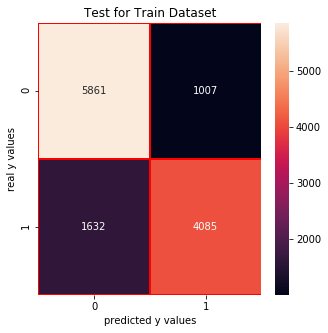

             precision    recall  f1-score   support

          0       0.78      0.85      0.82      6868
          1       0.80      0.71      0.76      5717

avg / total       0.79      0.79      0.79     12585



In [350]:
  
cm_knn = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()  
print(classification_report(y_test, y_pred))  

# k fold cross- validation

In [345]:
cross_val_score(classifier, x, y, scoring='accuracy', cv = 5).mean()

0.6586812212762807

In [346]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i,metric = 'manhattan')
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

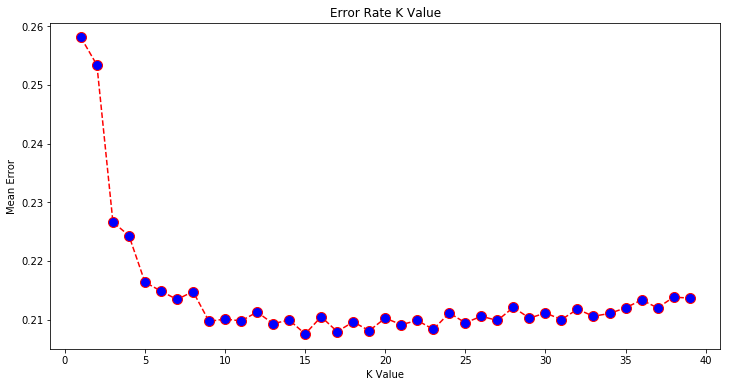

In [347]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

# Admission Dataset

In [21]:
Dataset2 = pd.read_csv("Admission_Predict.csv")
Dataset2.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Work Exp,Age,Volunteer/Leadership,Sports,Certificates/Awards,Languages,NGO,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,8,29,1,1,21,2,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0,29,1,1,25,3,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,10,23,1,1,13,5,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,8,22,1,1,16,6,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,6,20,0,1,4,2,1,0.65


In [22]:
Dataset2 = pd.DataFrame(Dataset2)
Dataset2.columns = Dataset2.columns.to_series().apply(lambda x: x.strip())
Dataset2['Admit'] = [1 if each > 0.60 else 0 for each in Dataset2['Chance of Admit']]
Dataset2.reset_index()
y2 = Dataset2['Admit'].values
x2 = Dataset2.drop(['Admit'],axis = 1)
N_rows = Dataset2.shape[0] 
Dataset2.index

RangeIndex(start=0, stop=5203, step=1)

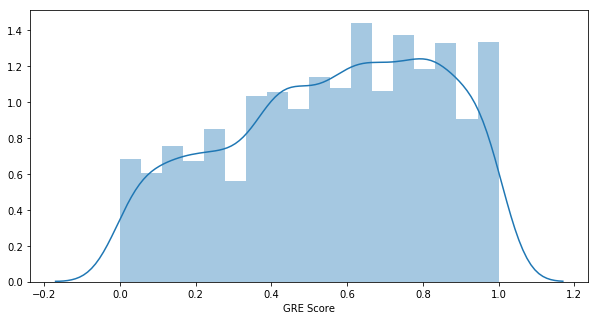

In [23]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.30)

scalerX = MinMaxScaler(feature_range=(0, 1))
x2_train[x2_train.columns] = scalerX.fit_transform(x2_train[x2_train.columns])
x2_test[x2_test.columns] = scalerX.transform(x2_test[x2_test.columns])
sns.distplot(x2_train['GRE Score'])

# ReLu and Sigmoid activation

In [24]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=16))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [25]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [26]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]

In [27]:
#Fitting the data to the training dataset
model =classifier.fit(x2_train,y2_train,epochs=30,callbacks=callbacks,batch_size =32,validation_data=(x2_test, y2_test))

Train on 3642 samples, validate on 1561 samples
Epoch 1/30
3642/3642 [==============================] - 1s 177us/step - loss: 0.6906 - acc: 0.5524 - val_loss: 0.6864 - val_acc: 0.5554
Epoch 2/30
3642/3642 [==============================] - 0s 48us/step - loss: 0.6726 - acc: 0.5524 - val_loss: 0.6517 - val_acc: 0.5554
Epoch 3/30
3642/3642 [==============================] - 0s 72us/step - loss: 0.6129 - acc: 0.5524 - val_loss: 0.5718 - val_acc: 0.5554
Epoch 4/30
3642/3642 [==============================] - 0s 61us/step - loss: 0.5209 - acc: 0.6922 - val_loss: 0.4830 - val_acc: 0.8398
Epoch 5/30
3642/3642 [==============================] - 0s 72us/step - loss: 0.4438 - acc: 0.8600 - val_loss: 0.4205 - val_acc: 0.8898
Epoch 6/30
3642/3642 [==============================] - 0s 65us/step - loss: 0.3891 - acc: 0.9050 - val_loss: 0.3751 - val_acc: 0.9142
Epoch 7/30
3642/3642 [==============================] - 0s 66us/step - loss: 0.3485 - acc: 0.9283 - val_loss: 0.3437 - val_acc: 0.9481
Epoch 

In [28]:
eval_model=classifier.evaluate(x2_train, y2_train)
eval_model

3642/3642 [==============================] - 0s 19us/step


[0.08442166094544953, 0.9909390444810544]

In [29]:
y_pred=classifier.predict(x2_test)
y_pred =(y_pred>0.5)

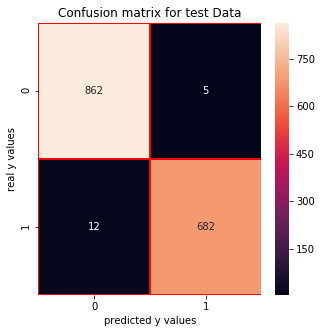

In [31]:
cm_nn_1 = confusion_matrix(y2_test, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nn_1,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Confusion matrix for test Data")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

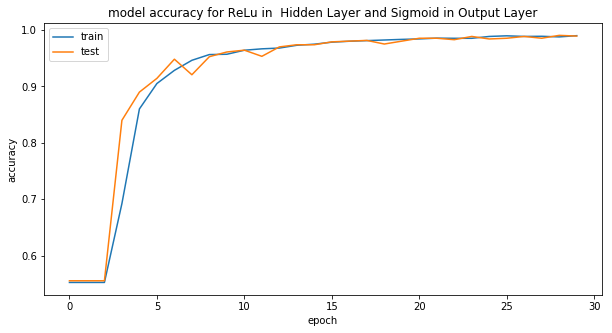

In [32]:
import matplotlib.pyplot as plt
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy for ReLu in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

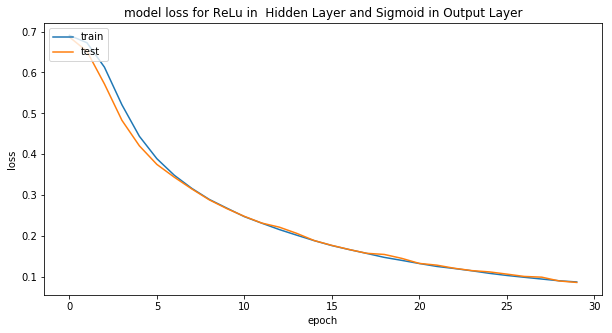

In [33]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss for ReLu in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ReLu and Softmax activation function

In [34]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=16))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='softmax', kernel_initializer='random_normal'))

In [35]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [36]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]

In [37]:
#Fitting the data to the training dataset
model_1 =classifier.fit(x2_train,y2_train,epochs=30,callbacks=callbacks,batch_size =32,validation_data=(x2_test, y2_test))

Train on 3642 samples, validate on 1561 samples
Epoch 1/30
3642/3642 [==============================] - 1s 215us/step - loss: 8.8073 - acc: 0.4476 - val_loss: 8.8546 - val_acc: 0.4446
Epoch 2/30
3642/3642 [==============================] - 0s 45us/step - loss: 8.8073 - acc: 0.4476 - val_loss: 8.8546 - val_acc: 0.4446
Epoch 3/30
3642/3642 [==============================] - 0s 46us/step - loss: 8.8073 - acc: 0.4476 - val_loss: 8.8546 - val_acc: 0.4446


In [38]:
y_pred=classifier.predict(x2_test)
y_pred =(y_pred>0.5)

In [39]:
eval_model=classifier.evaluate(x2_train, y2_train)
eval_model

3642/3642 [==============================] - 0s 19us/step


[8.807270745010836, 0.44755628780307904]

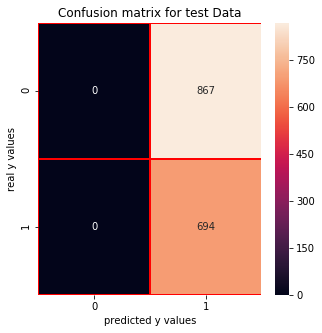

In [41]:
cm_nn_2 = confusion_matrix(y2_test, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nn_2,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Confusion matrix for test Data")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

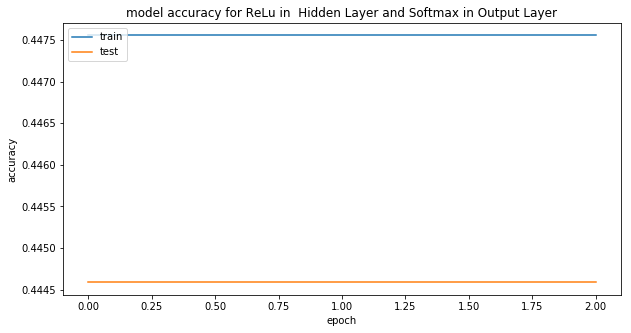

In [44]:
import matplotlib.pyplot as plt
plt.plot(model_1.history['acc'])
plt.plot(model_1.history['val_acc'])
plt.title('model accuracy for ReLu in  Hidden Layer and Softmax in Output Layer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

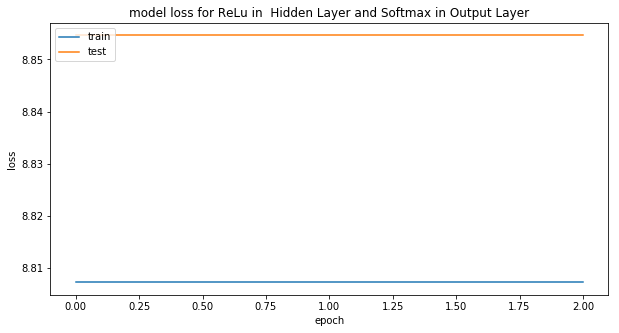

In [45]:
plt.plot(model_1.history['loss'])
plt.plot(model_1.history['val_loss'])
plt.title('model loss for ReLu in  Hidden Layer and Softmax in Output Layer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Sigmoid activation function

In [46]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='sigmoid', kernel_initializer='random_normal', input_dim=16))
# #Second  Hidden Layer
classifier.add(Dense(4, activation='sigmoid', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [47]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [48]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]

In [49]:
#Fitting the data to the training dataset
model_2 =classifier.fit(x2_train,y2_train,epochs=30,callbacks=callbacks,batch_size =32,validation_data=(x2_test, y2_test))

Train on 3642 samples, validate on 1561 samples
Epoch 1/30
3642/3642 [==============================] - 1s 223us/step - loss: 0.6915 - acc: 0.5277 - val_loss: 0.6886 - val_acc: 0.5554
Epoch 2/30
3642/3642 [==============================] - 0s 46us/step - loss: 0.6881 - acc: 0.5524 - val_loss: 0.6870 - val_acc: 0.5554
Epoch 3/30
3642/3642 [==============================] - 0s 65us/step - loss: 0.6873 - acc: 0.5524 - val_loss: 0.6864 - val_acc: 0.5554
Epoch 4/30
3642/3642 [==============================] - 0s 73us/step - loss: 0.6868 - acc: 0.5524 - val_loss: 0.6858 - val_acc: 0.5554
Epoch 5/30
3642/3642 [==============================] - 0s 68us/step - loss: 0.6861 - acc: 0.5524 - val_loss: 0.6849 - val_acc: 0.5554
Epoch 6/30
3642/3642 [==============================] - 0s 63us/step - loss: 0.6848 - acc: 0.5524 - val_loss: 0.6833 - val_acc: 0.5554
Epoch 7/30
3642/3642 [==============================] - 0s 61us/step - loss: 0.6825 - acc: 0.5524 - val_loss: 0.6806 - val_acc: 0.5554
Epoch 

In [50]:
y_pred=classifier.predict(x2_test)
y_pred =(y_pred>0.5)

In [51]:
eval_model=classifier.evaluate(x2_train, y2_train)
eval_model

3642/3642 [==============================] - 0s 18us/step


[0.16956732514989958, 0.971169686985173]

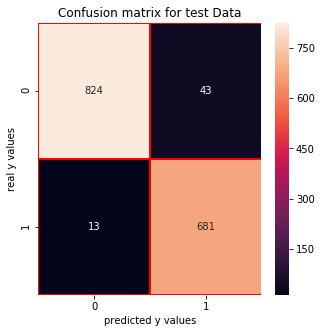

In [52]:
cm_nn_2 = confusion_matrix(y2_test, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nn_2,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Confusion matrix for test Data")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

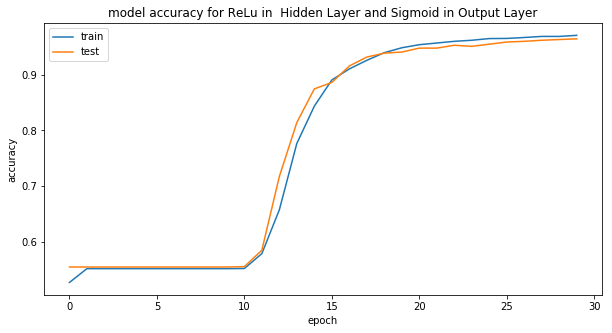

In [53]:
import matplotlib.pyplot as plt
plt.plot(model_2.history['acc'])
plt.plot(model_2.history['val_acc'])
plt.title('model accuracy for  Sigmoid ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

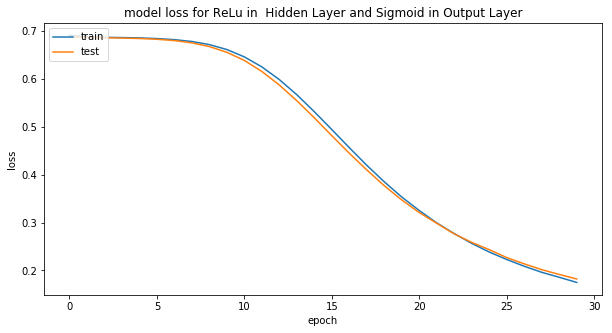

In [54]:
plt.plot(model_2.history['loss'])
plt.plot(model_2.history['val_loss'])
plt.title('model loss for  Sigmoid ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Tanh and sigmoid activation functions

In [55]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal', input_dim=16))
# #Second  Hidden Layer
classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [56]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [57]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]

In [58]:
#Fitting the data to the training dataset
model_3 =classifier.fit(x2_train,y2_train,epochs=30,callbacks=callbacks,batch_size =32,validation_data=(x2_test, y2_test))

Train on 3642 samples, validate on 1561 samples
Epoch 1/30
3642/3642 [==============================] - 1s 227us/step - loss: 0.6908 - acc: 0.5483 - val_loss: 0.6850 - val_acc: 0.5554
Epoch 2/30
3642/3642 [==============================] - 0s 53us/step - loss: 0.6599 - acc: 0.6293 - val_loss: 0.6172 - val_acc: 0.7482
Epoch 3/30
3642/3642 [==============================] - 0s 58us/step - loss: 0.5394 - acc: 0.8451 - val_loss: 0.4690 - val_acc: 0.8757
Epoch 4/30
3642/3642 [==============================] - 0s 64us/step - loss: 0.3867 - acc: 0.9119 - val_loss: 0.3405 - val_acc: 0.9013
Epoch 5/30
3642/3642 [==============================] - 0s 70us/step - loss: 0.2795 - acc: 0.9393 - val_loss: 0.2570 - val_acc: 0.9315
Epoch 6/30
3642/3642 [==============================] - 0s 58us/step - loss: 0.2158 - acc: 0.9498 - val_loss: 0.2094 - val_acc: 0.9404
Epoch 7/30
3642/3642 [==============================] - 0s 56us/step - loss: 0.1775 - acc: 0.9566 - val_loss: 0.1786 - val_acc: 0.9488
Epoch 

In [59]:
y_pred=classifier.predict(x2_test)
y_pred =(y_pred>0.5)

In [60]:
eval_model=classifier.evaluate(x2_train, y2_train)
eval_model

3642/3642 [==============================] - 0s 21us/step


[0.035335662510329914, 0.985996705107084]

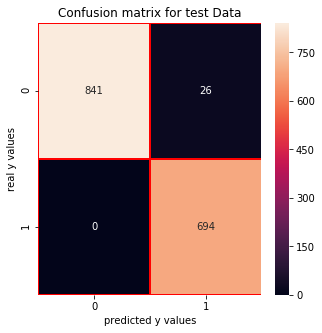

In [62]:
cm_nn_3 = confusion_matrix(y2_test, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nn_3,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Confusion matrix for test Data")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

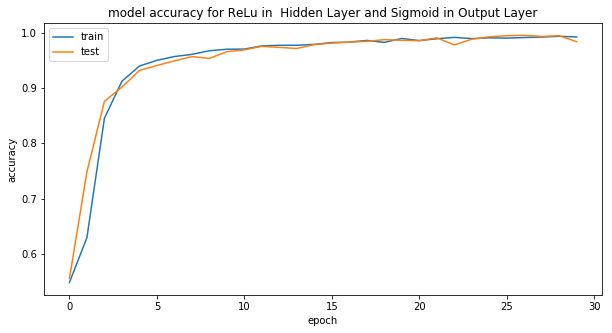

In [63]:
import matplotlib.pyplot as plt
plt.plot(model_3.history['acc'])
plt.plot(model_3.history['val_acc'])
plt.title('model accuracy for ReLu in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

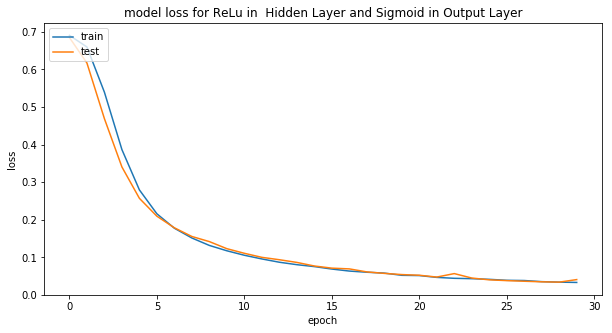

In [64]:
plt.plot(model_3.history['loss'])
plt.plot(model_3.history['val_loss'])
plt.title('model loss for ReLu in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Tuning hyperparameters

In [152]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal', input_dim=16))
# #Second  Hidden Layer
classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal'))
# # #Third  Hidden Layer
# classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [153]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [154]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]

In [155]:
#Fitting the data to the training dataset
model_4 =classifier.fit(x2_train,y2_train,epochs=30,callbacks=callbacks,batch_size =32,validation_data=(x2_test, y2_test))

Train on 3642 samples, validate on 1561 samples
Epoch 1/30
3642/3642 [==============================] - 1s 362us/step - loss: 0.6870 - acc: 0.5574 - val_loss: 0.6771 - val_acc: 0.5554
Epoch 2/30
3642/3642 [==============================] - 0s 43us/step - loss: 0.6445 - acc: 0.6620 - val_loss: 0.5999 - val_acc: 0.7783
Epoch 3/30
3642/3642 [==============================] - 0s 41us/step - loss: 0.5219 - acc: 0.8432 - val_loss: 0.4578 - val_acc: 0.8674
Epoch 4/30
3642/3642 [==============================] - 0s 41us/step - loss: 0.3776 - acc: 0.9069 - val_loss: 0.3308 - val_acc: 0.9161
Epoch 5/30
3642/3642 [==============================] - 0s 42us/step - loss: 0.2740 - acc: 0.9401 - val_loss: 0.2557 - val_acc: 0.9283
Epoch 6/30
3642/3642 [==============================] - 0s 39us/step - loss: 0.2124 - acc: 0.9500 - val_loss: 0.2071 - val_acc: 0.9443
Epoch 7/30
3642/3642 [==============================] - 0s 40us/step - loss: 0.1740 - acc: 0.9599 - val_loss: 0.1825 - val_acc: 0.9379
Epoch 

In [146]:
y_pred=classifier.predict(x2_test)
y_pred =(y_pred>0.5)

In [147]:
eval_model=classifier.evaluate(x2_train, y2_train)
eval_model

3642/3642 [==============================] - 0s 23us/step


[0.022152085373263023, 0.9931356397583745]

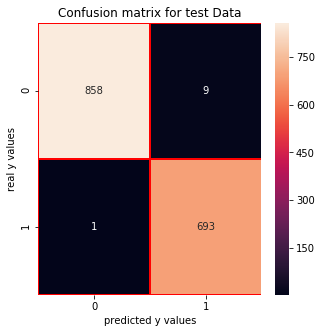

In [148]:
cm_nn_4 = confusion_matrix(y2_test, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nn_4,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Confusion matrix for test Data")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

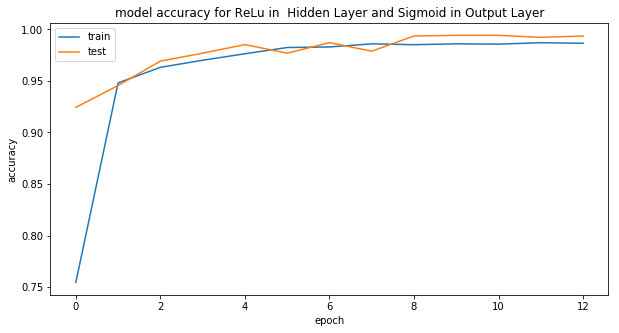

In [149]:
plt.plot(model_4.history['acc'])
plt.plot(model_4.history['val_acc'])
plt.title('model accuracy for ReLu in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

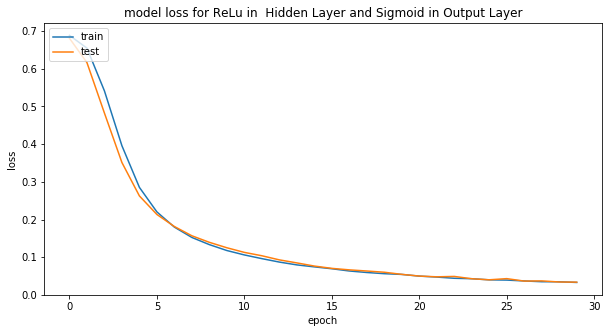

In [87]:
plt.plot(model_4.history['loss'])
plt.plot(model_4.history['val_loss'])
plt.title('model loss for ReLu in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# K fold cross validation

In [151]:
# Create function returning a compiled network
def create_network():
    
    classifier = Sequential()
    #First Hidden Layer
    classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal', input_dim=54))
    # #Second  Hidden Layer
    classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal'))
#     # Third Hidden layer
#     classifier.add(Dense(10, activation='tanh', kernel_initializer='random_normal'))
    #Output Layer
    classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
    # Compile neural network
    #Compiling the neural network
    classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
    
    # Return compiled network
    return classifier
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=30, 
                                 batch_size=32, 
                                 verbose=0)
# Evaluate neural network using three-fold cross-validation
cross_val_score(neural_network, x, y, cv=5).mean()

0.5467586263930962

# KNN

In [375]:
classifier = KNeighborsClassifier(n_neighbors=23,metric = 'manhattan')  
classifier.fit(x2_train, y2_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

In [376]:
y_pred = classifier.predict(x2_test)  

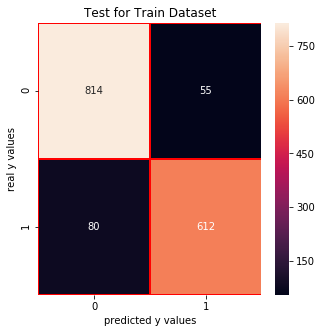

             precision    recall  f1-score   support

          0       0.91      0.94      0.92       869
          1       0.92      0.88      0.90       692

avg / total       0.91      0.91      0.91      1561



In [377]:
cm_knn = confusion_matrix(y2_test,y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()  
print(classification_report(y2_test, y_pred))  

In [378]:
cross_val_score(classifier, x, y, scoring='accuracy', cv = 5).mean()

0.6670237768167608

In [373]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i,metric = 'manhattan')
    knn.fit(x2_train, y2_train)
    pred_i = knn.predict(x2_test)
    error.append(np.mean(pred_i != y2_test))

Text(0,0.5,'Mean Error')

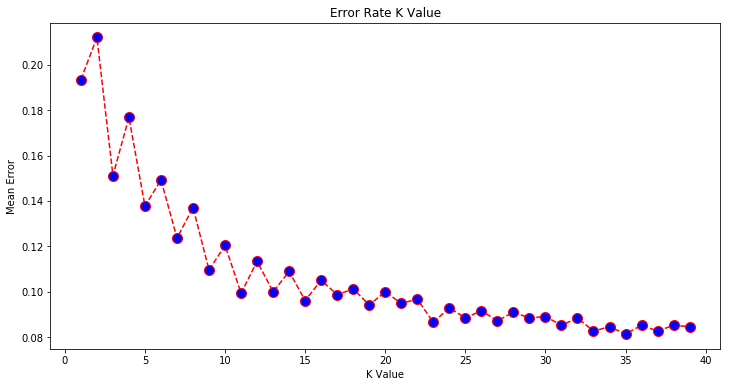

In [374]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')